#Réalisé par :
BEN HARRAF Raja

#Régression linaire

In [1]:
#importation des bibliothéques
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
df = pd.read_csv("data1.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


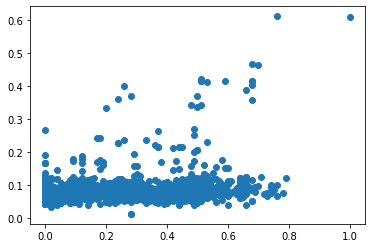

In [15]:
# nuage des points 
aff=plt.scatter(df['citric acid'],df['chlorides'])

In [18]:
#selectionner une colonne
x=df['citric acid'].values
x

array([0.  , 0.  , 0.04, ..., 0.13, 0.12, 0.47])

In [19]:
y=df['chlorides'].values
y

array([0.076, 0.098, 0.092, ..., 0.076, 0.075, 0.067])

In [20]:
x=x.reshape(x.shape[0],1)
y=y.reshape(y.shape[0],1)
y.shape

(1599, 1)

In [21]:
#en divisant l'ensemble de données en un ensemble  training set et test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/6 , random_state=0)

In [22]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
#prédire les résultats de l'ensemble de tests
y_pred = reg.predict(x_test)

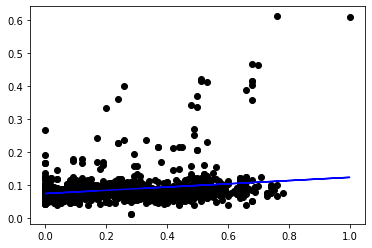

In [24]:
#visualiser les résultats de l'ensemble d'entraînement
plt.scatter(x_train , y_train, color = 'black')
plt.plot(x_train, reg.predict(x_train), color= 'blue')

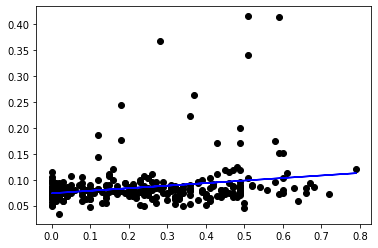

In [25]:
#visualisation des résultats de l'ensemble de test
plt.scatter(x_test , y_test, color = 'black')
plt.plot(x_test, reg.predict(x_test), color= 'blue')

#Clustring

#1- Algorithme de K-Means:

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#mportation de data
df = pd.read_csv("income.csv",sep=";")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,610000
3,Ismail,28,60000
4,Kory,42,15000


Text(0, 0.5, 'Income($)')

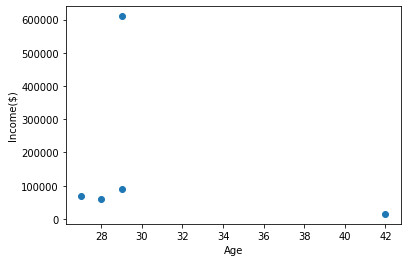

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 1, 0, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.000000,0.092437,0
1,Michael,0.133333,0.126050,0
2,Mohan,0.133333,1.000000,1
3,Ismail,0.066667,0.075630,0
4,Kory,1.000000,0.000000,2


In [ ]:
km.cluster_centers_

array([[2.80000000e+01, 7.33333333e+04],
       [2.90000000e+01, 6.10000000e+05],
       [4.20000000e+01, 1.50000000e+04]])

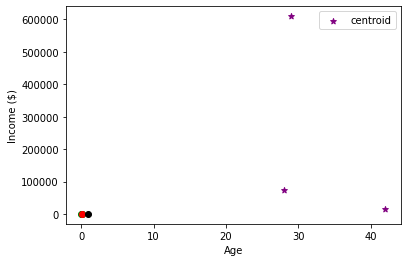

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.000000,0.092437,0
1,Michael,0.133333,0.126050,0
2,Mohan,0.133333,1.000000,1
3,Ismail,0.066667,0.075630,0
4,Kory,1.000000,0.000000,2


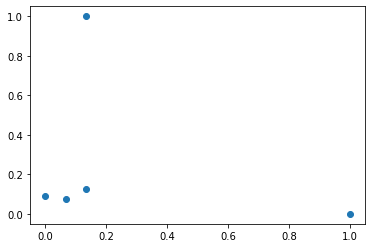

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 0, 1, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.000000,0.092437,1
1,Michael,0.133333,0.126050,1
2,Mohan,0.133333,1.000000,0
3,Ismail,0.066667,0.075630,1
4,Kory,1.000000,0.000000,2


In [ ]:
km.cluster_centers_

array([[0.13333333, 1.        ],
       [0.06666667, 0.09803922],
       [1.        , 0.        ]])

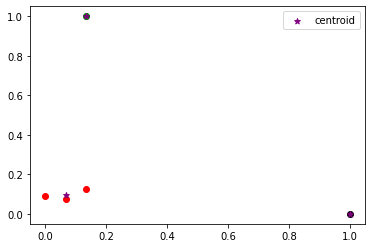

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

#2- Algorithme de DBSCAN :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importation de dataset

In [ ]:
#importation de data
data = pd.read_csv("data1.csv",sep=";") 

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
x = data['fixed acidity']
print(x.shape)

(1599,)


##Calculer les paramètres requis pour le clustering DBSCAN

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(data)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

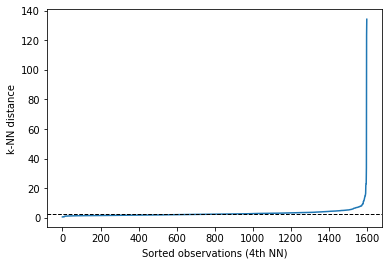

In [ ]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

##Calculer le clustering DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=2.5, min_samples=4).fit(data)
# get cluster labels
clusters.labels_

array([ 0, -1,  1, ..., 30,  0,  0])

In [ ]:
set(clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30}

##Visualisation du clustering DBSCAN

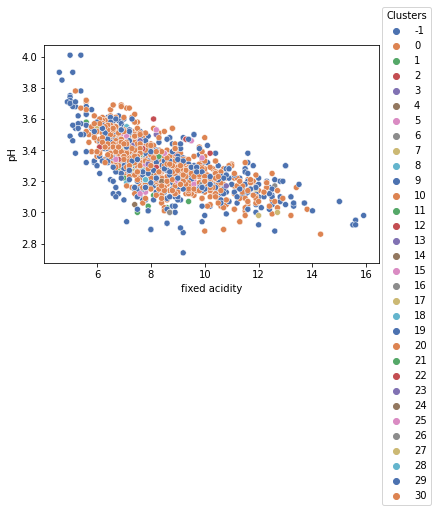

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=data, x="fixed acidity", y="pH", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

#3- Clustring hiérarchique :

In [ ]:
import pandas as pd

data = pd.read_csv('lung_cancer.csv', sep=';', index_col='id_sample')
print('data', data.shape)
data.head()

data (150, 53)


,APOC1,MERTK,CMTM3,XPR1,H2BC5,MSMO1,TMEM97,IFFO2,FAM89A,CTSH,...,MELK,MMP12,SOX9,APBA2,NFIB,GRK5,TMEM150B,tissue_status,source,class
id_sample,,,,,,,,,,,,,,,,,,,,,
TCGA-43-6647-01A,3.692305,2.569732,4.155590,4.094676,2.792685,4.901656,2.290414,4.404727,2.749062,6.560401,...,2.044266,7.120371,4.692437,2.630496,1.996536,1.927014,1.280060,tumoral,TCGA-LUSC,SQC
TCGA-22-4593-01A,2.949213,1.027134,4.030874,2.677671,3.339568,6.229210,5.446595,4.415215,2.714060,2.739495,...,3.737576,2.693306,5.017445,1.988419,4.082883,1.961332,0.320457,tumoral,TCGA-LUSC,SQC
TCGA-92-7341-01A,5.400119,3.897991,3.961812,4.805674,3.608529,6.396105,4.997865,3.701787,4.218262,4.566433,...,3.668505,6.228964,3.631651,2.902791,2.988236,1.996756,0.459460,tumoral,TCGA-LUSC,SQC
TCGA-68-8251-01A,3.774515,2.150148,4.081626,3.183550,1.947876,4.221295,4.161457,2.794275,3.145032,4.488327,...,3.278803,6.731229,4.789792,2.956461,2.591611,1.337750,0.842107,tumoral,TCGA-LUSC,SQC
TCGA-85-8479-01A,2.022175,0.795053,2.062744,3.044048,5.256811,4.986559,2.568166,4.760918,3.918480,5.046272,...,2.593756,1.851387,3.478012,0.346543,0.749769,1.143228,0.171289,tumoral,TCGA-LUSC,SQC


In [ ]:
# Données d'expression de 50 gènes
X = data.select_dtypes('number') 
print('X', X.shape)

X (150, 50)


In [ ]:
# Etiquettes des échantillons
y = data['class']
print('y', y.shape, y.unique())

y (150,) ['SQC' 'ADK' 'NTL']


## Appliquer une normalisation centrée-réduite
Une normalisation de données est nécessaire pour ramener les niveaux d'expression de gènes à la même échelle. Pour des raisons pédagogiques, on réalise ici une normalisation centrée-réduite explicitement dans une étape séparée. Il est néanmoins possible de l'intégrer à la dernière étape du pipeline, simplement en option de la méthode `clustermap` de la librairie `seaborn`. 

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
print('X_scaled', X_scaled.shape)

X_scaled (150, 50)


## Définir les couleurs pour chaque classe

In [ ]:
class_color = {'NTL': 'aquamarine', 'ADK': 'darkslateblue', 'SQC': 'darkorange'}
y_color = [class_color[c] for c in y]

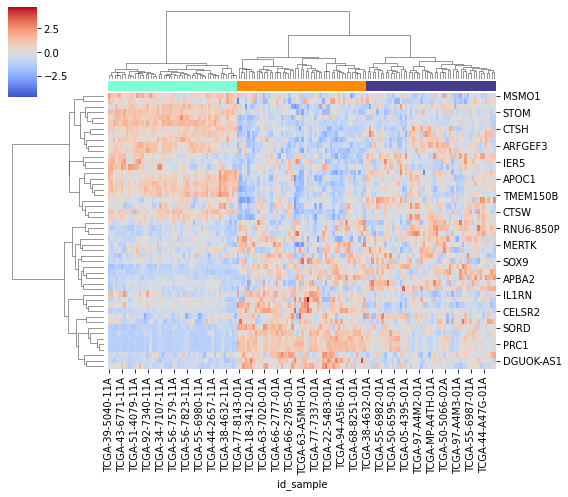

In [ ]:
import seaborn as sns

metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled.T, figsize=(8, 7), metric=metric, method=method, cmap=cmap, row_cluster=True, col_cluster=True, col_colors=y_color,
                             center=0.0, vmin=-4.8, vmax=4.8)